**Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

**Error Handling for CSV Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
try:
    df = pd.read_csv('/content/FitnessBot_Dataset.csv')
    print(df.columns)  # Print columns to verify their names
except FileNotFoundError:
    print("Error: The dataset file was not found.")
    exit()

Index(['Age', 'Gender', 'Activity_Level', 'Body_Type', 'Goal',
       'Training_Split', 'Diet_Advice'],
      dtype='object')


**Function: Display Fitness Advice**

In [ ]:
def fitness_advice(body_type, goal):
    """Fetch fitness advice based on body type and goal."""
    advice = df[(df['Body_Type'] == body_type) & (df['Goal'] == goal)]
    if not advice.empty:
        training_plan = advice.iloc[0]['Training_Split']
        diet_recommendation = advice.iloc[0]['Diet_Advice']
        return training_plan, diet_recommendation
    else:
        return None, None

**Function: Display Macro Chart**

In [ ]:
def show_macro_chart():
    """Display a macro distribution chart."""
    labels = ['Protein', 'Carbs', 'Fats']
    values = [30, 50, 20]
    plt.figure(figsize=(6, 6))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Macro Distribution for Maintenance')
    plt.show()

**Chatbot**

Welcome to FitBot! Let's achieve your fitness goals together.
What is your age? 20
What is your gender? (Male/Female): Male
How physically active are you? (Sedentary, Lightly Active, Moderately Active, Very Active): Sedentary

Identify your body type:
1. Ectomorph (Long, lean, struggles to gain weight).
2. Mesomorph (Athletic, well-defined muscles).
3. Endomorph (Rounded, gains weight easily).
Enter your body type (Ectomorph/Mesomorph/Endomorph): Ectomorph

Based on your inputs, here's your personalized fitness plan:
Body Type: Ectomorph
Fitness Goal: Bulking

Training Plan:
Focus on strength training with heavy weights, 4-5 days/week

Dietary Recommendations:
Eat high-calorie, protein-rich foods; consume 5-6 meals/day.

Would you like to see a macro distribution chart? (yes/no): yes


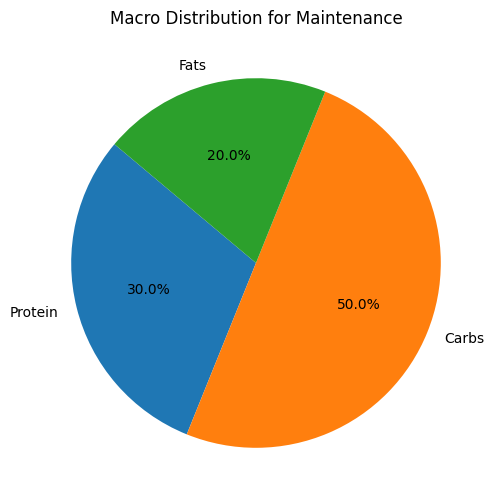

In [ ]:
def fitbot():
    """Run the FitBot chatbot."""
    print("Welcome to FitBot! Let's achieve your fitness goals together.")
    try:
        # Collect user details
        age = int(input("What is your age? "))
        if age < 17:
            print("Sorry, FitBot is designed for users aged 17 and above.")
            return

        gender = input("What is your gender? (Male/Female): ").strip().capitalize()
        activity_level = input("How physically active are you? (Sedentary, Lightly Active, Moderately Active, Very Active): ").strip().capitalize()
        print("\nIdentify your body type:")
        print("1. Ectomorph (Long, lean, struggles to gain weight).")
        print("2. Mesomorph (Athletic, well-defined muscles).")
        print("3. Endomorph (Rounded, gains weight easily).")
        body_type = input("Enter your body type (Ectomorph/Mesomorph/Endomorph): ").strip().capitalize()

        # Determine goal based on body type
        if body_type == "Ectomorph":
            goal = "Bulking"
        elif body_type == "Mesomorph":
            goal = "Maintenance"
        elif body_type == "Endomorph":
            goal = "Cutting"
        else:
            print("Invalid body type.")
            return

        # Fetch fitness advice
        training_plan, diet_recommendation = fitness_advice(body_type, goal)

        if training_plan and diet_recommendation:
            print(f"\nBased on your inputs, here's your personalized fitness plan:")
            print(f"Body Type: {body_type}")
            print(f"Fitness Goal: {goal}")
            print("\nTraining Plan:")
            print(training_plan)
            print("\nDietary Recommendations:")
            print(diet_recommendation)

            # Optionally show macro chart
            show_macro = input("\nWould you like to see a macro distribution chart? (yes/no): ").strip().lower()
            if show_macro == 'yes':
                show_macro_chart()
        else:
            print("Sorry, we couldn't fetch a plan for your details. Please try again.")

    except ValueError:
        print("Invalid input. Please enter the correct details.")

# Run FitBot
fitbot()